In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ValueIteration import *
from JointInference import *
import math
from matplotlib.patches import Rectangle
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def plotPosteriors(posteriors, title="", labels=['KLM', 'KML', 'LKM', 'LMK', 'MKL', 'MLK'], subplotRowNumber = 2, subplotColNumber = 3, figDim = (10,5)):
    x, y  = posteriors.shape
    fig, ax = plt.subplots(nrows=subplotRowNumber, ncols=subplotColNumber, figsize = figDim)
    colors = plt.cm.viridis(np.linspace(0,1,y))
    plotIndex = 0 
    for row in ax:
        for col in row:
            col.plot(range(x), posteriors[:,plotIndex], color = colors[plotIndex], label = labels[plotIndex])
            col.legend()
            plotIndex += 1
    fig.suptitle(title)
    plt.show()

In [3]:
# Environment
stateSet = [(0, 0),(1, 3),(3, 0),(0, 2),(2, 1),(2, 3),(1, 0),(0, 3),(4, 0),(0, 1),(1, 2),(3, 3),(3, 1),(2, 0),(4, 3),(4, 1),(1, 1)]
actionSet = [(1,0), (0,1), (-1,0), (0,-1), (0,0)]

truck1Location = (0,0)
truck2Location = (4,3)

allWorlds = ['KL', 'KM', 'LK', 'LM', 'MK', 'ML']

#Rewards
mostDesiredFood = 100
middleDesiredFood = 75
leastDesiredFood = 50
actionCost = -1
stayCost = -.1

#Parameters for Value Iteration
convergenceTolerance =10e-7
gamma = .99
beta = .8

In [4]:
JI = JointInference(stateSet, actionSet, truck1Location, truck2Location, allWorlds, mostDesiredFood, middleDesiredFood, leastDesiredFood, actionCost, stayCost, convergenceTolerance, gamma, beta)

In [5]:
## Example 1
beliefAtTime0 = (.17,.17,.17,.17,.17,.17)
example1World = ("LK")
example1PositionTrajectory = [(4, 1),(3, 1),(2, 1),(1, 1),(1, 2),(1, 3),(0, 3),(0, 2),(0, 1),(0, 0)]
# answer should be MLK: 1

#Example 2
beliefAtTime0 = (.17,.17,.17,.17,.17,.17)
example2World = ("LM")
example2PositionTrajectory = [(4, 1), (3, 1), (3, 0), (2, 0), (1, 0), (0, 0)]
# answer should be LMK: 0.5, LKM: 0.5

#Example 3
beliefAtTime0 = (.17,.17,.17,.17,.17,.17)
example3World = ("LM")
example3PositionTrajectory = [(4, 1), (3, 1), (2, 1), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3)]
# answer should be MLK: 0.33, MKL: 0.33, KML, 0.33 

Example 1: answer should be MLK = 1


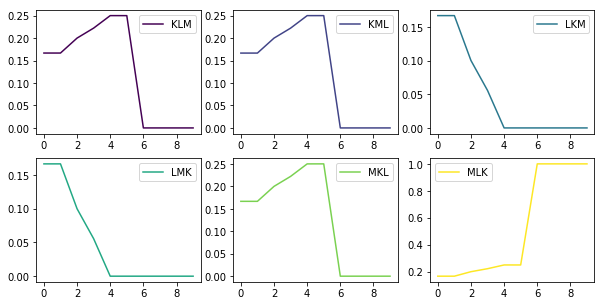


Example 2: answer should be LMK: 0.5, LKM: 0.5


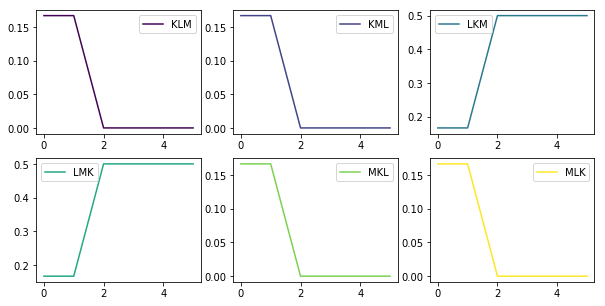


Example 3: answer should be MLK: 0.33, MKL: 0.33, KML, 0.33 


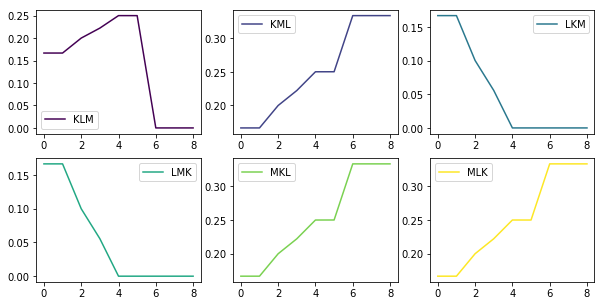

In [6]:
p1, Beliefs1 = JI.inference(beliefAtTime0, example1World, example1PositionTrajectory)
p2, Beliefs2 = JI.inference(beliefAtTime0, example2World, example2PositionTrajectory)
p3, Beliefs3 = JI.inference(beliefAtTime0, example3World, example3PositionTrajectory)

print("Example 1: answer should be MLK = 1")
plotPosteriors(p1)
print()
print("Example 2: answer should be LMK: 0.5, LKM: 0.5")
plotPosteriors(p2)
print()
print("Example 3: answer should be MLK: 0.33, MKL: 0.33, KML, 0.33 ")
plotPosteriors(p3)
print()

In [7]:
print("Inferred Belief1 cross time")
print(Beliefs1)
print()
print("Inferred Belief2 cross time")
print(Beliefs2)
print()
print("Inferred Belief3 cross time")
print(Beliefs3)
print()

Inferred Belief1 cross time
[[ 0.17  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.17  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.17  0.5   0.5   0.5   0.5   1.    1.    1.    1.    1.  ]
 [ 0.17  0.5   0.5   0.5   0.5   0.    0.    0.    0.    0.  ]
 [ 0.17  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.17  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]

Inferred Belief2 cross time
[[ 0.17  0.    0.    0.    0.    0.  ]
 [ 0.17  0.    0.    0.    0.    0.  ]
 [ 0.17  0.5   0.5   0.5   0.5   0.5 ]
 [ 0.17  0.5   0.5   0.5   0.5   0.5 ]
 [ 0.17  0.    0.    0.    0.    0.  ]
 [ 0.17  0.    0.    0.    0.    0.  ]]

Inferred Belief3 cross time
[[ 0.17  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.17  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.17  0.5   0.5   0.5   0.5   0.    0.    0.    0.  ]
 [ 0.17  0.5   0.5   0.5   0.5   1.    1.    1.    1.  ]
 [ 0.17  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.17  0.    

In [8]:
def visualizePolicy(gridWidth, gridHeight, goalStates, trapStates, policy, belief_state):
    #grid height/width
    gridAdjust = .5
    gridScale = 1.5
    arrowScale = .5
    
    xs = np.linspace(-gridAdjust, gridWidth-gridAdjust, gridWidth+1)
    ys = np.linspace(-gridAdjust, gridHeight-gridAdjust, gridHeight+1)
    
    plt.rcParams["figure.figsize"] = [gridWidth*gridScale,gridHeight*gridScale]
    ax = plt.gca(frameon=False, xticks = range(gridWidth), yticks = range(gridHeight))

    #goal and trap coloring 
    for goalState in goalStates:
        ax.add_patch(Rectangle((goalState[0]-gridAdjust, goalState[1]-gridAdjust), 1, 1, fill=True, color='green', alpha=.1))
    
    for (trapx, trapy) in trapStates:
        ax.add_patch(Rectangle((trapx-gridAdjust, trapy-gridAdjust), 1, 1, fill=True, color='black', alpha=.1))

    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color = "black")
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color = "black")

    #labeled values
    for (position, belief) in policy:
        if belief == belief_state:
            (statex, statey) = position
            for (optimalActionX, optimalActionY), actionProb in policy[(position, belief)].items():
                plt.arrow(statex, statey, optimalActionX*actionProb*arrowScale, optimalActionY*actionProb*arrowScale, head_width=0.05*actionProb, head_length=0.1*actionProb)    

    plt.show()

Belief State: (0, 0, 0, 0, 0, 1)


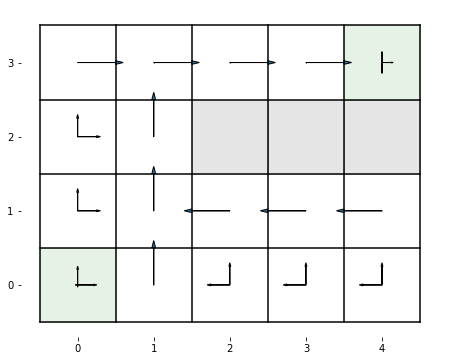

Belief State: (0.5, 0.5, 0, 0, 0, 0)


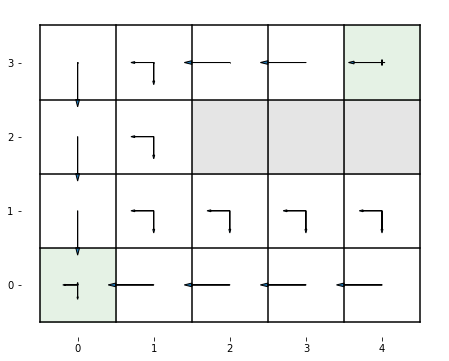

Belief State: (0, 0, 0.5, 0.5, 0, 0)


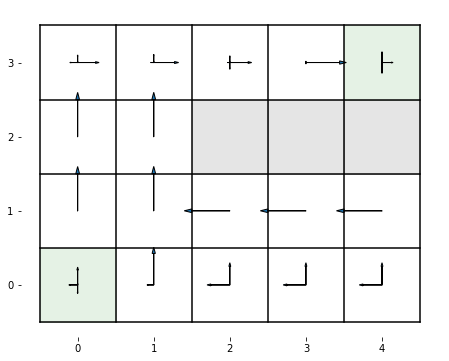

Belief State: (0, 0.5, 0, 0.5, 0, 0)


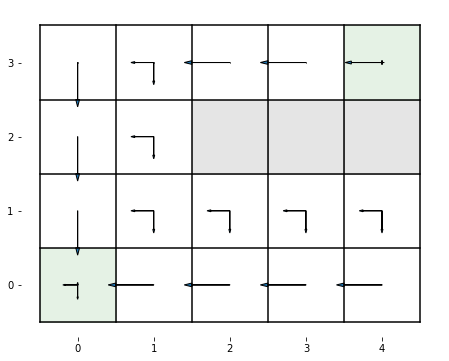

Belief State: (0.17, 0.17, 0.17, 0.17, 0.17, 0.17)


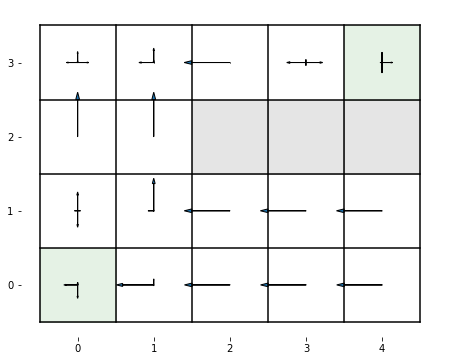

In [9]:
# preference : KLM
goalStates = [(0, 0, "A"), (4,3,"B")]
gridWidth = 5
gridHeight = 4
trapStates = [(2,2), (3,2), (4,2)]
belief_states = [(0,0,0,0,0,1), (.5,.5,0,0,0,0), (0,0,.5,.5,0,0), (0,.5,0,.5,0,0), (.17,.17,.17,.17,.17,.17)]
for belief_state in belief_states:
    print("Belief State:", belief_state)
    visualizePolicy(gridWidth, gridHeight, goalStates, trapStates, JI.policies[0], belief_state)